# Baseline Retrieval Értékelés - Test Split

Ez a notebook a HybridRetriever baseline teljesítményét mutatja a test split-en.

**Fontos:** A baseline eredmények az `eval_per_query_results.csv` fájlból származnak, ami a GRPO kiértékelés során készült, biztosítva a konzisztenciát a `model_comparison.ipynb` notebookkal.

**Metrikák:**
- nDCG@K: Normalized Discounted Cumulative Gain
- MAP: Mean Average Precision
- MRR: Mean Reciprocal Rank
- Precision@K, Recall@K

**Forrás:** `data/models/grpo_policy/eval_per_query_results.csv`

In [33]:
# Imports
import json
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project root hozzáadása
project_root = Path.cwd().parent
if project_root not in [Path(p) for p in sys.path]:
    sys.path.insert(0, str(project_root))

from configs import config

print("✅ Imports sikeres")
print(f"📁 Project root: {project_root}")

✅ Imports sikeres
📁 Project root: /Users/zelenyianszkimate/Documents/CourtRankRL


## 2. Baseline Eredmények Betöltése

A baseline eredményeket az `eval_per_query_results.csv` fájlból töltjük be, ami a GRPO kiértékelés során készült RunPod-on. Ez biztosítja a konzisztenciát a `model_comparison.ipynb` notebookkal.

In [34]:
# Baseline eredmények betöltése az eval_per_query_results.csv-ből
eval_results_path = config.GRPO_POLICY_DIR / "eval_per_query_results.csv"

if not eval_results_path.exists():
    raise FileNotFoundError(f"Eval results file not found: {eval_results_path}")

# Teljes eval eredmények betöltése
eval_df = pd.read_csv(eval_results_path)

# Baseline oszlopok kinyerése
baseline_cols = [col for col in eval_df.columns if col.startswith('baseline_')]
print(f"✅ Eval eredmények betöltve: {len(eval_df)} query")
print(f"📊 Baseline oszlopok: {baseline_cols}")

# Query-szintű metrikák DataFrame készítése
query_metrics_df = eval_df[['query_id'] + baseline_cols].copy()

# Oszlopok átnevezése (baseline_ prefix eltávolítása)
rename_dict = {col: col.replace('baseline_', '') for col in baseline_cols}
query_metrics_df = query_metrics_df.rename(columns=rename_dict)

print(f"\n📋 Query-szintű metrikák:")
display(query_metrics_df.head())

✅ Eval eredmények betöltve: 141 query
📊 Baseline oszlopok: ['baseline_map', 'baseline_mrr', 'baseline_ndcg@5', 'baseline_precision@5', 'baseline_recall@5', 'baseline_ndcg@10', 'baseline_precision@10', 'baseline_recall@10', 'baseline_ndcg@20', 'baseline_precision@20', 'baseline_recall@20']

📋 Query-szintű metrikák:


,query_id,map,mrr,ndcg@5,precision@5,recall@5,ndcg@10,precision@10,recall@10,ndcg@20,precision@20,recall@20
0,munkavállalói felmondás sérelemdíj jogorvoslat...,1.000000,1.0,1.000000,0.4,1.000000,1.000000,0.2,1.0,1.000000,0.1,1.0
1,fogyasztói szerződés fogyasztói jogok jogorvos...,1.000000,1.0,1.000000,0.4,1.000000,1.000000,0.2,1.0,1.000000,0.1,1.0
2,alapítvány célmódosítás összeférhetetlenség ér...,1.000000,1.0,1.000000,0.4,1.000000,1.000000,0.2,1.0,1.000000,0.1,1.0
3,szerződésen kívüli kártérítés biztosító helytá...,0.413847,0.5,0.383566,0.4,0.333333,0.437683,0.3,0.5,0.662220,0.3,1.0
4,szülői felügyelet gyakorlása végrehajthatóság ...,0.571429,1.0,0.760188,0.2,0.500000,0.760188,0.1,0.5,0.857476,0.1,1.0


## 3. Aggregált Metrikák Számítása

In [35]:
# Aggregált metrikák számítása a baseline oszlopokból
aggregated_metrics = {
    'num_queries': len(query_metrics_df),
}

# Minden numerikus metrika átlagolása
for col in query_metrics_df.columns:
    if col != 'query_id':
        aggregated_metrics[col] = query_metrics_df[col].mean()

print("✅ Aggregált metrikák kiszámítva:")
for key, value in aggregated_metrics.items():
    if isinstance(value, float):
        print(f"   • {key}: {value:.4f}")
    else:
        print(f"   • {key}: {value}")

✅ Aggregált metrikák kiszámítva:
   • num_queries: 141
   • map: 0.5058
   • mrr: 0.6473
   • ndcg@5: 0.5064
   • precision@5: 0.2794
   • recall@5: 0.4283
   • ndcg@10: 0.5744
   • precision@10: 0.2135
   • recall@10: 0.6181
   • ndcg@20: 0.6970
   • precision@20: 0.1670
   • recall@20: 1.0000


## 4. Aggregált Eredmények Megjelenítése

In [ ]:
print("\n" + "="*60)
print("🎯 BASELINE TELJESÍTMÉNY (Aggregált Metrikák)")
print("="*60)

print(f"\n📈 Általános statisztikák:")
print(f"  • Értékelt query-k száma: {aggregated_metrics['num_queries']}")

print(f"\n🎯 Főbb metrikák:")
print(f"  • nDCG@10:     {aggregated_metrics.get('ndcg@10', 0.0):.4f}")
print(f"  • MAP:         {aggregated_metrics.get('map', 0.0):.4f}")
print(f"  • MRR:         {aggregated_metrics.get('mrr', 0.0):.4f}")

print(f"\n📊 nDCG különböző K értékeken:")
for k in [5, 10, 20]:
    key = f"ndcg@{k}"
    if key in aggregated_metrics:
        print(f"  • nDCG@{k}:  {aggregated_metrics[key]:.4f}")

print(f"\n🎯 Precision különböző K értékeken:")
for k in [5, 10, 20]:
    key = f"precision@{k}"
    if key in aggregated_metrics:
        print(f"  • P@{k}:     {aggregated_metrics[key]:.4f}")

print(f"\n📈 Recall különböző K értékeken:")
for k in [5, 10, 20]:
    key = f"recall@{k}"
    if key in aggregated_metrics:
        print(f"  • R@{k}:     {aggregated_metrics[key]:.4f}")

print("\n" + "="*60)

## 5. Query-szintű Eredmények

In [ ]:
if not query_metrics_df.empty:
    print("\n📋 Top 10 legjobb teljesítményű query (nDCG@10 alapján):")
    display(query_metrics_df.nlargest(10, "ndcg@10")[["query_id", "ndcg@10", "map", "mrr", "precision@10", "recall@10"]])
    
    print("\n📋 Top 10 leggyengébb teljesítményű query (nDCG@10 alapján):")
    display(query_metrics_df.nsmallest(10, "ndcg@10")[["query_id", "ndcg@10", "map", "mrr", "precision@10", "recall@10"]])

## 6. Vizualizációk

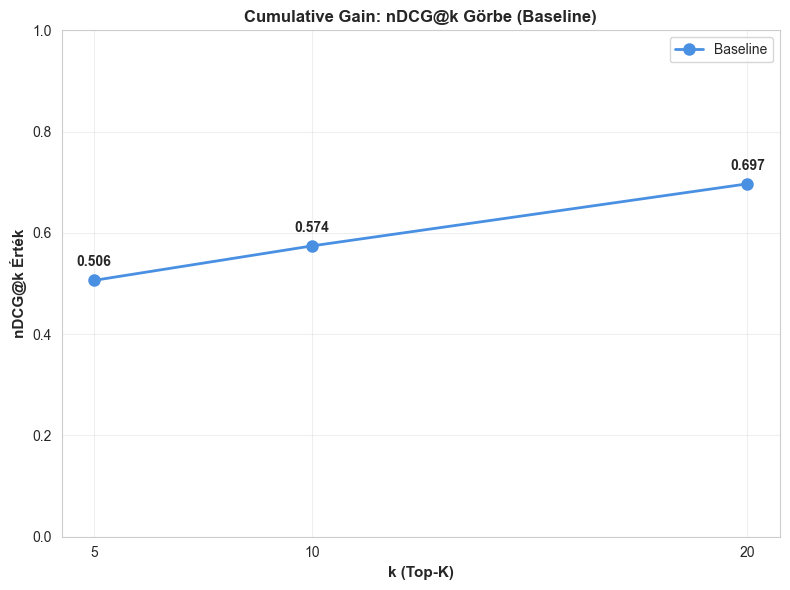

📊 BASELINE CUMULATIVE GAIN STATISZTIKÁK

nDCG@5:  0.5064
nDCG@10: 0.5744
nDCG@20: 0.6970

💡 INTERPRETÁCIÓ:
   📈 A nDCG növekszik a mélyebb pozíciókkal (+0.1906 k=5→20)
   → Több releváns dokumentum található a rangsor végén


In [36]:
if not query_metrics_df.empty:
    # Stílus beállítása
    sns.set_style("whitegrid")
    
    # nDCG@k értékek összegyűjtése k=5, 10, 20 értékekre
    k_values = [5, 10, 20]
    baseline_ndcg_values = []
    
    for k in k_values:
        key = f"ndcg@{k}"
        if key in aggregated_metrics:
            baseline_ndcg_values.append(aggregated_metrics[key])
        else:
            baseline_ndcg_values.append(0)
    
    # Konzisztens vizualizáció a model_comparison.ipynb-vel
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # Baseline nDCG@k görbe (ugyanaz a stílus mint a model_comparison-ben)
    ax.plot(k_values, baseline_ndcg_values, marker='o', label='Baseline', 
            color='#4A90E2', linewidth=2, markersize=8)
    
    # Értékek feliratozása a pontokon
    for k, val in zip(k_values, baseline_ndcg_values):
        ax.annotate(f'{val:.3f}', (k, val), textcoords="offset points", 
                   xytext=(0, 10), ha='center', fontsize=10, fontweight='bold')
    
    ax.set_xlabel('k (Top-K)', fontsize=11, fontweight='bold')
    ax.set_ylabel('nDCG@k Érték', fontsize=11, fontweight='bold')
    ax.set_title('Cumulative Gain: nDCG@k Görbe (Baseline)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)
    ax.set_xticks(k_values)
    ax.set_ylim(0, 1.0)
    
    plt.tight_layout()
    plt.show()
    
    # Statisztikák
    print("="*60)
    print("📊 BASELINE CUMULATIVE GAIN STATISZTIKÁK")
    print("="*60)
    print(f"\nnDCG@5:  {baseline_ndcg_values[0]:.4f}")
    print(f"nDCG@10: {baseline_ndcg_values[1]:.4f}")
    print(f"nDCG@20: {baseline_ndcg_values[2]:.4f}")
    
    # Trend elemzés
    print(f"\n💡 INTERPRETÁCIÓ:")
    if baseline_ndcg_values[2] > baseline_ndcg_values[0]:
        improvement = baseline_ndcg_values[2] - baseline_ndcg_values[0]
        print(f"   📈 A nDCG növekszik a mélyebb pozíciókkal (+{improvement:.4f} k=5→20)")
        print(f"   → Több releváns dokumentum található a rangsor végén")
    else:
        print(f"   📉 A nDCG csökken a mélyebb pozíciókkal")
        print(f"   → A legtöbb releváns dokumentum az elején koncentrálódik")
    print("="*60)


## 7. nDCG@10 Részletes Eloszlás

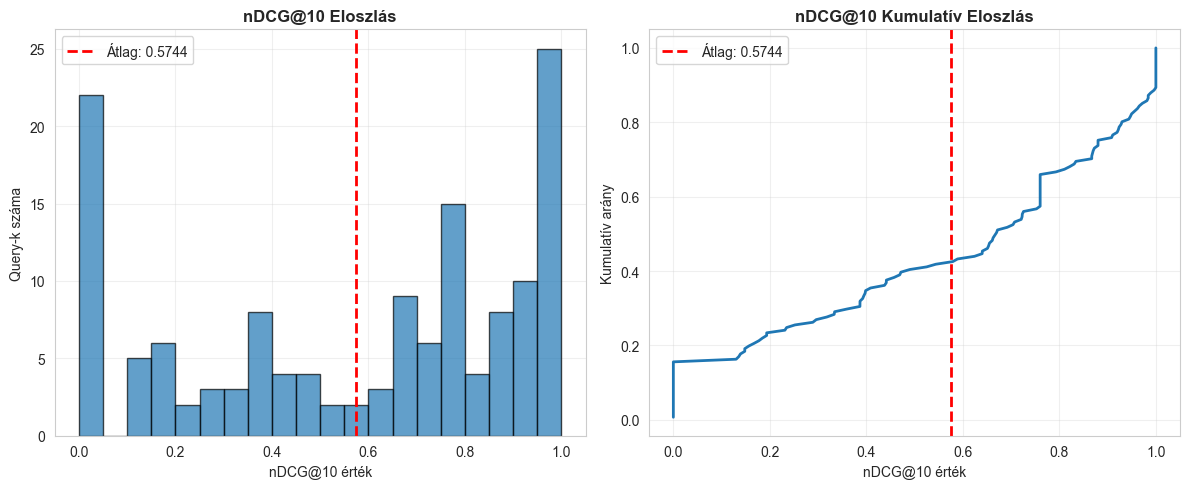


📊 nDCG@10 Percentilisek:
  • 10. percentilis: 0.0000
  • 25. percentilis: 0.2520
  • 50. percentilis: 0.6698
  • 75. percentilis: 0.8801
  • 90. percentilis: 1.0000


In [37]:
if not query_metrics_df.empty and 'ndcg@10' in query_metrics_df.columns:
    plt.figure(figsize=(12, 5))
    
    # Hisztogram
    plt.subplot(1, 2, 1)
    plt.hist(query_metrics_df['ndcg@10'], bins=20, alpha=0.7, edgecolor='black')
    plt.axvline(aggregated_metrics['ndcg@10'], color='red', linestyle='--', linewidth=2, label=f'Átlag: {aggregated_metrics["ndcg@10"]:.4f}')
    plt.title('nDCG@10 Eloszlás', fontsize=12, fontweight='bold')
    plt.xlabel('nDCG@10 érték')
    plt.ylabel('Query-k száma')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Kumulatív eloszlás
    plt.subplot(1, 2, 2)
    sorted_ndcg = np.sort(query_metrics_df['ndcg@10'])
    cumulative = np.arange(1, len(sorted_ndcg) + 1) / len(sorted_ndcg)
    plt.plot(sorted_ndcg, cumulative, linewidth=2)
    plt.axvline(aggregated_metrics['ndcg@10'], color='red', linestyle='--', linewidth=2, label=f'Átlag: {aggregated_metrics["ndcg@10"]:.4f}')
    plt.title('nDCG@10 Kumulatív Eloszlás', fontsize=12, fontweight='bold')
    plt.xlabel('nDCG@10 érték')
    plt.ylabel('Kumulatív arány')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Percentilisek
    percentiles = [10, 25, 50, 75, 90]
    print("\n📊 nDCG@10 Percentilisek:")
    for p in percentiles:
        value = np.percentile(query_metrics_df['ndcg@10'], p)
        print(f"  • {p}. percentilis: {value:.4f}")

## 8. Összefoglalás

In [38]:
print("\n" + "="*60)
print("📝 ÖSSZEFOGLALÁS - BASELINE TELJESÍTMÉNY")
print("="*60)

print(f"\n✅ Baseline értékelés a test split-en ({aggregated_metrics['num_queries']} query):")
print(f"   • nDCG@10: {aggregated_metrics.get('ndcg@10', 0.0):.4f}")
print(f"   • MAP:     {aggregated_metrics.get('map', 0.0):.4f}")
print(f"   • MRR:     {aggregated_metrics.get('mrr', 0.0):.4f}")
print(f"   • P@10:    {aggregated_metrics.get('precision@10', 0.0):.4f}")
print(f"   • R@10:    {aggregated_metrics.get('recall@10', 0.0):.4f}")

print(f"\n📊 Adatforrás:")
print(f"   • eval_per_query_results.csv (GRPO kiértékelésből)")
print(f"   • Konzisztens a model_comparison.ipynb eredményeivel")

print("\n" + "="*60)


📝 ÖSSZEFOGLALÁS - BASELINE TELJESÍTMÉNY

✅ Baseline értékelés a test split-en (141 query):
   • nDCG@10: 0.5744
   • MAP:     0.5058
   • MRR:     0.6473
   • P@10:    0.2135
   • R@10:    0.6181

📊 Adatforrás:
   • eval_per_query_results.csv (GRPO kiértékelésből)
   • Konzisztens a model_comparison.ipynb eredményeivel

